In [1]:
#Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
#Reading Data
Dtime = pd.read_csv('delivery_time.csv')
Dtime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## EDA Process:

In [3]:
Dtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
Dtime.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


In [5]:
Dtime['Delivery Time'].unique()
Dtime['Sorting Time'].unique()

array([10,  4,  6,  9,  7,  3,  8,  2,  5], dtype=int64)

In [6]:
Dtime.shape

(21, 2)

In [7]:
Dtime[Dtime.duplicated()]

,Delivery Time,Sorting Time


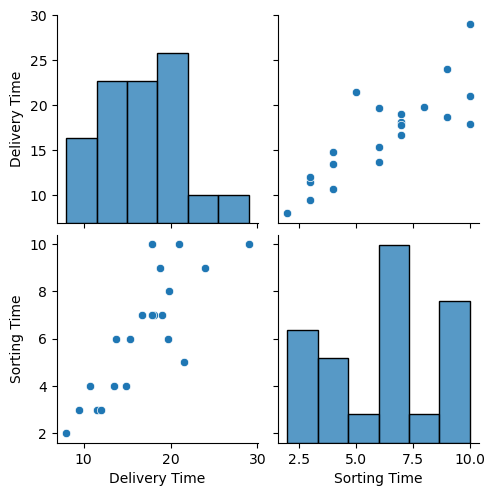

In [8]:
sns.pairplot(data = Dtime)
plt.show()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_9128\1033421431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dtime['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

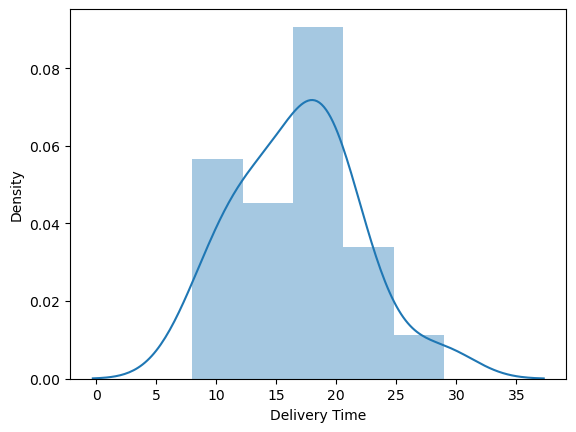

In [9]:
sns.distplot(Dtime['Delivery Time'])

C:\Users\Anup0\AppData\Local\Temp\ipykernel_9128\985654925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Dtime['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

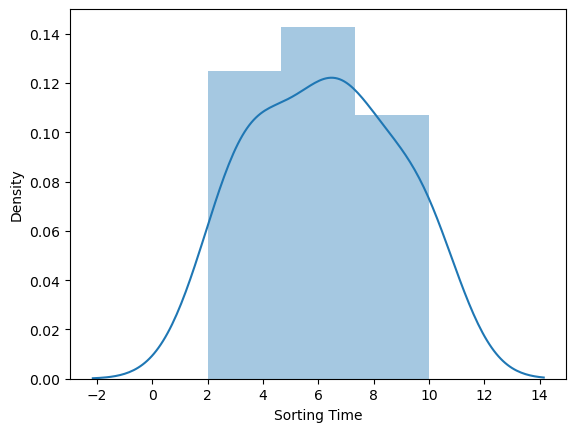

In [10]:
sns.distplot(Dtime['Sorting Time'])

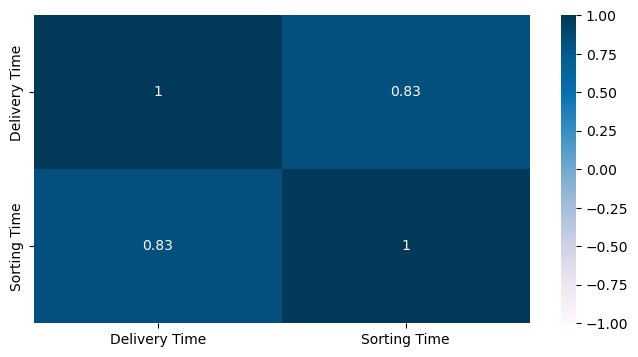

In [11]:
#Checking for correlation between variables:
plt.figure(figsize=(8,4))
sns.heatmap(Dtime.corr(),vmax = 1,vmin=-1,annot=True,cmap='PuBu')
plt.show()

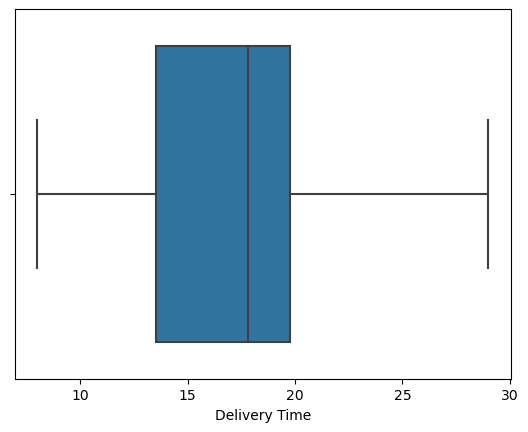

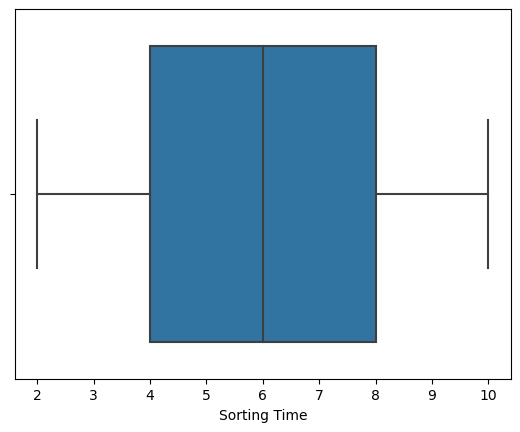

In [12]:
#Checking for outliers
sns.boxplot(x='Delivery Time',data = Dtime)
plt.show()
sns.boxplot(x='Sorting Time',data = Dtime)
plt.show()

In [13]:
Dtime_sqrt=np.sqrt(Dtime)

## Preparing a Model

In [15]:
x=np.array(Dtime_sqrt['Sorting Time']).reshape(-1,1)
y_target=np.array(Dtime_sqrt['Delivery Time']).reshape(-1,1)
print(x,y_target)

[[3.16227766]
 [2.        ]
 [2.44948974]
 [3.        ]
 [3.16227766]
 [2.44948974]
 [2.64575131]
 [1.73205081]
 [3.16227766]
 [3.        ]
 [2.82842712]
 [2.        ]
 [2.64575131]
 [1.73205081]
 [1.73205081]
 [2.        ]
 [2.44948974]
 [2.64575131]
 [1.41421356]
 [2.64575131]
 [2.23606798]] [[4.58257569]
 [3.67423461]
 [4.44409721]
 [4.89897949]
 [5.38516481]
 [3.9179076 ]
 [4.35889894]
 [3.082207  ]
 [4.23083916]
 [4.33012702]
 [4.45308882]
 [3.27871926]
 [4.08411557]
 [3.39116499]
 [3.46842904]
 [3.8574603 ]
 [3.70809924]
 [4.25558457]
 [2.82842712]
 [4.22255847]
 [4.63680925]]


In [16]:
model = sm.OLS(y_target,x).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 23 Aug 2023   Prob (F-statistic):                    2.10e-20
Time:                        11:12:26   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting Y from X using our model:

In [18]:
pred_y = model.predict(x)

In [19]:
pred_y

array([5.17460357, 3.27270665, 4.00823069, 4.90905998, 5.17460357,
       4.00823069, 4.32938396, 2.8342471 , 5.17460357, 4.90905998,
       4.62830613, 3.27270665, 4.32938396, 2.8342471 , 2.8342471 ,
       3.27270665, 4.00823069, 4.32938396, 2.31415307, 4.32938396,
       3.65899727])

In [20]:
Dtime['Pred_Delivery_Time']=pred_y

In [21]:
Dtime.head()

,Delivery Time,Sorting Time,Pred_Delivery_Time
0,21.00,10,5.174604
1,13.50,4,3.272707
2,19.75,6,4.008231
3,24.00,9,4.909060
4,29.00,10,5.174604


## Preparing another model

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model2 = LinearRegression()
model2.fit(x,y_target)

LinearRegression()

In [23]:
y_pred = model2.predict(x)


In [24]:
#Evaluating the model:
mse = mean_squared_error(y_target,y_pred)
print('mean_squared_error is : ' ,mse)
r2 = r2_score(y_target,y_pred)
print('r2_score is : ' ,r2)

mean_squared_error is :  0.1010669038561377
r2_score is :  0.7292011987544664


## Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values(x):
    return (x-x.mean())/x.std()

C:\Users\Anup0\AppData\Local\Temp\ipykernel_9128\2201258831.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(get_standardized_values(Dtime['Pred_Delivery_Time']),get_standardized_values(Dtime['Delivery Time'] - Dtime['Pred_Delivery_Time']),cmap='PuBu')


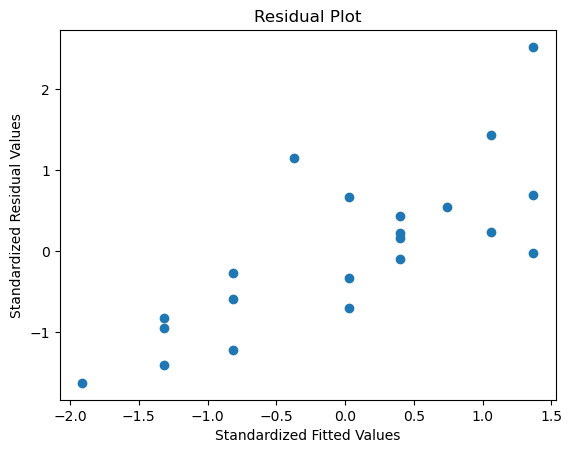

In [26]:
plt.scatter(get_standardized_values(Dtime['Pred_Delivery_Time']),get_standardized_values(Dtime['Delivery Time'] - Dtime['Pred_Delivery_Time']),cmap='PuBu')
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [27]:
#No pattern Observed. Hence model is correct.


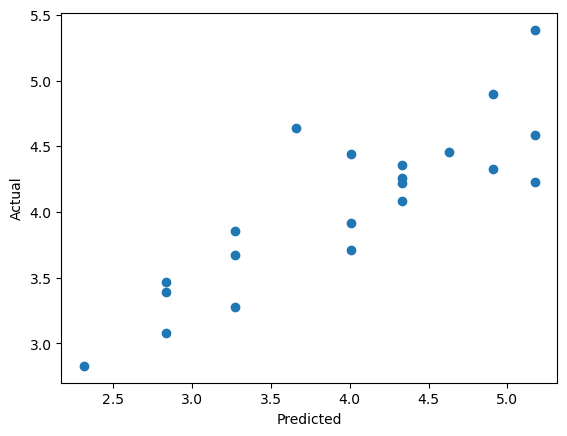

In [28]:
plt.scatter(x=pred_y,y=y_target)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()